# Model Tuning XGBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb

warnings.filterwarnings('ignore')
%matplotlib inline

SEED=42

In [2]:
ci_i5_ap = pd.read_csv('./data/ci_i5_ap.csv')

In [3]:
ci_i5_ap_train, ci_i5_ap_test, ci_i5_ap_train_Y, ci_i5_ap_test_Y = train_test_split(ci_i5_ap, ci_i5_ap['price'], test_size=0, random_state=42)
ci_i5_ap_train.drop('price', axis=1, inplace=True)
ci_i5_ap_train.drop('date', axis=1, inplace=True)
ci_i5_ap_train.drop('id', axis=1, inplace=True)
ci_i5_ap_train.drop('waterfront', axis=1, inplace=True)

In [4]:
ci_i5_ap_train.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
i5_dist          float64
yr_purch           int64
mnth_purch         int64
distSeattle      float64
durSeattle       float64
distBellevue     float64
durBellevue      float64
distRedmond      float64
durRedmond       float64
distBF           float64
distRA           float64
distSeaTac       float64
dtype: object

In [6]:
params = {
    'objective': ['reg:linear'],
    'seed': [SEED],

    # 1
    'n_estimators': range(2000, 3050, 50),
    
    # 2
    'min_child_weight': range(1, 7, 2),
    'max_depth': [1, 3, 5, 7, 9],
    'subsample': [0.5, 0.625, 0.75, 0.875, 1.0],
    'colsample_bytree': [0.5, 0.625, 0.75, 0.875, 1.0],
    
    # 3
    'reg_lambda': [0, 0.25, 0.5, 0.75, 1.0],
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1.0],
    
    # 4
    'learning_rate': [0.01]
}

### n_estimators

In [7]:
scores = dict()

for n_estimator in params['n_estimators']:
    if 'n_estimators' not in scores:
        scores['n_estimators'] = dict()
    gbm_ci_i5_ap = xgb.XGBRegressor(n_estimators=n_estimator, seed=42)
    cv = cross_val_score(gbm_ci_i5_ap, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['n_estimators'][n_estimator] = cv.mean()

print(scores)

{'n_estimators': {2000: -36250.80859375, 2050: -36292.81328125, 2100: -36279.6484375, 2150: -36221.5546875, 2200: -36144.3171875, 2250: -36099.890625, 2300: -36173.5296875, 2350: -36092.59375, 2400: -36007.53828125, 2450: -35880.03203125, 2500: -35893.1671875, 2550: -35890.93359375, 2600: -35856.709375, 2650: -35858.871875, 2700: -35891.409375, 2750: -35829.734375, 2800: -35879.50390625, 2850: -35867.096875, 2900: -35930.87265625, 2950: -35961.5015625, 3000: -35921.56015625}}


### min_child_weight

In [8]:
backup = scores.copy()

for min_child_weight in params['min_child_weight']:
    if 'min_child_weight' not in scores:
        scores['min_child_weight'] = dict()
    gbm_ci_i5_ap = xgb.XGBRegressor(
        n_estimators=2750, 
        min_child_weight=min_child_weight, 
        seed=42
    )
    cv = cross_val_score(gbm_ci_i5_ap, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['min_child_weight'][min_child_weight] = cv.mean()

print(scores)

{'n_estimators': {2000: -36250.80859375, 2050: -36292.81328125, 2100: -36279.6484375, 2150: -36221.5546875, 2200: -36144.3171875, 2250: -36099.890625, 2300: -36173.5296875, 2350: -36092.59375, 2400: -36007.53828125, 2450: -35880.03203125, 2500: -35893.1671875, 2550: -35890.93359375, 2600: -35856.709375, 2650: -35858.871875, 2700: -35891.409375, 2750: -35829.734375, 2800: -35879.50390625, 2850: -35867.096875, 2900: -35930.87265625, 2950: -35961.5015625, 3000: -35921.56015625}, 'min_child_weight': {1: -35829.734375, 3: -36279.1, 5: -36211.9671875}}


### max_depth

In [9]:
backup1 = scores.copy()

for max_depth in params['max_depth']:
    if 'max_depth' not in scores:
        scores['max_depth'] = dict()
    gbm_ci_i5_ap = xgb.XGBRegressor(
        n_estimators=2750, 
        min_child_weight=1,
        max_depth=max_depth,
        seed=42
    )
    cv = cross_val_score(gbm_ci_i5_ap, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
    scores['max_depth'][max_depth] = cv.mean()

print(scores)

{'n_estimators': {2000: -36250.80859375, 2050: -36292.81328125, 2100: -36279.6484375, 2150: -36221.5546875, 2200: -36144.3171875, 2250: -36099.890625, 2300: -36173.5296875, 2350: -36092.59375, 2400: -36007.53828125, 2450: -35880.03203125, 2500: -35893.1671875, 2550: -35890.93359375, 2600: -35856.709375, 2650: -35858.871875, 2700: -35891.409375, 2750: -35829.734375, 2800: -35879.50390625, 2850: -35867.096875, 2900: -35930.87265625, 2950: -35961.5015625, 3000: -35921.56015625}, 'min_child_weight': {1: -35829.734375, 3: -36279.1, 5: -36211.9671875}, 'max_depth': {1: -54811.0734375, 3: -35829.734375, 5: -35476.5671875, 7: -35444.921875, 9: -35419.925}}


### n_estimators

Text(0.5,1,'-MAE According to Number of Estimators')

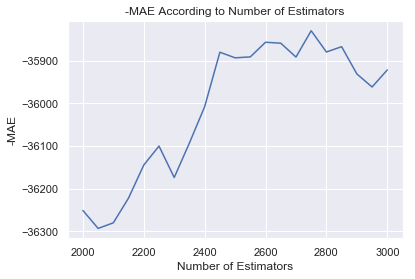

In [10]:
# convert to pandas dataframe
md = {'Number of Estimators': list(scores['n_estimators'].keys()), '-MAE': list(scores['n_estimators'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Number of Estimators', y='-MAE', data=md_df).set_title("-MAE According to Number of Estimators")

### min_child_weight

Text(0.5,1,'-MAE According to Minimum Child Weight')

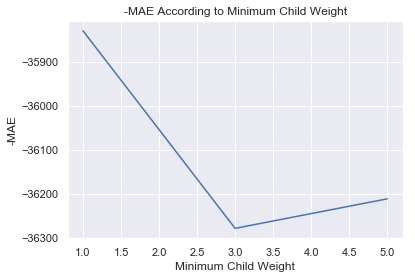

In [11]:
# convert to pandas dataframe
md = {'Minimum Child Weight': list(scores['min_child_weight'].keys()), '-MAE': list(scores['min_child_weight'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Minimum Child Weight', y='-MAE', data=md_df).set_title("-MAE According to Minimum Child Weight")

### max_depth

Text(0.5,1,'-MAE According to Maximum Depth')

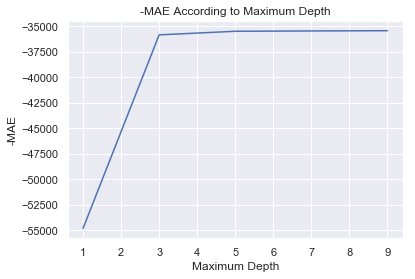

In [12]:
# convert to pandas dataframe
md = {'Maximum Depth': list(scores['max_depth'].keys()), '-MAE': list(scores['max_depth'].values())}
md_df = pd.DataFrame(md)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='Maximum Depth', y='-MAE', data=md_df).set_title("-MAE According to Maximum Depth")

Best parameters are n_estimators=2750, min_child_weight=1, and max_depth=9 for a $-MAE$ of -35419.92

In [5]:
gbm_ci_i5_ap = xgb.XGBRegressor(
    n_estimators=2750, 
    min_child_weight=1,
    max_depth=9,
    seed=42
)
# gbm_ci_i5_ap.fit(ci_i5_ap_train, ci_i5_ap_train_Y)

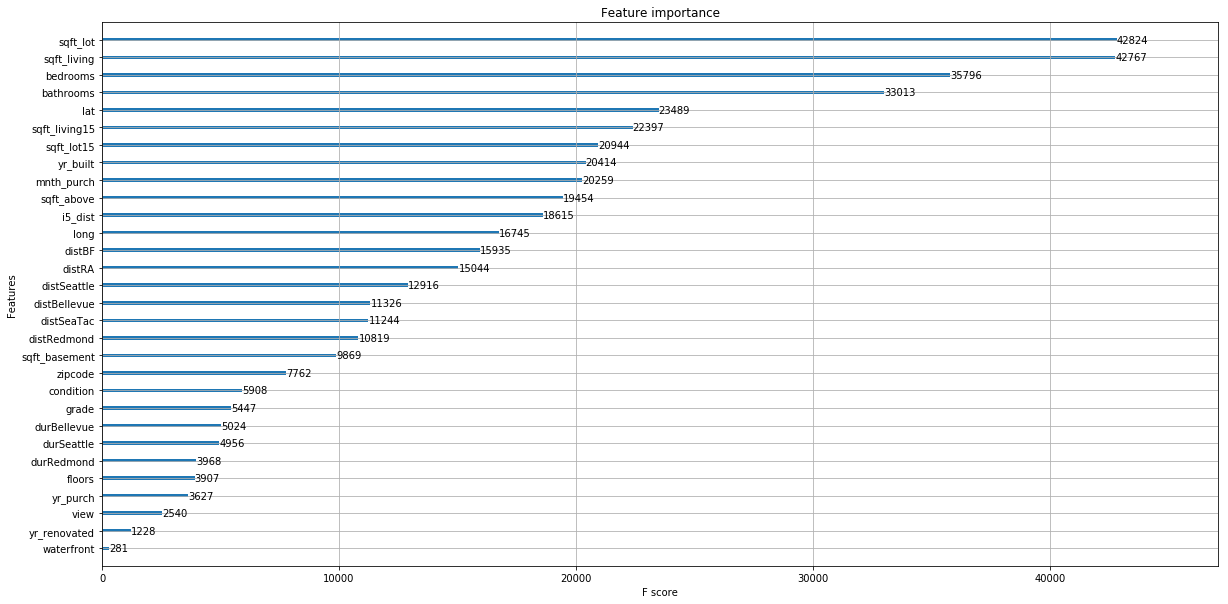

In [8]:
ax = xgb.plot_importance(gbm_ci_i5_ap)
fig = ax.figure
fig.set_size_inches(20, 10)

In [6]:
cv = cross_val_score(gbm_ci_i5_ap, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='neg_median_absolute_error')
cv.mean()

-35453.275

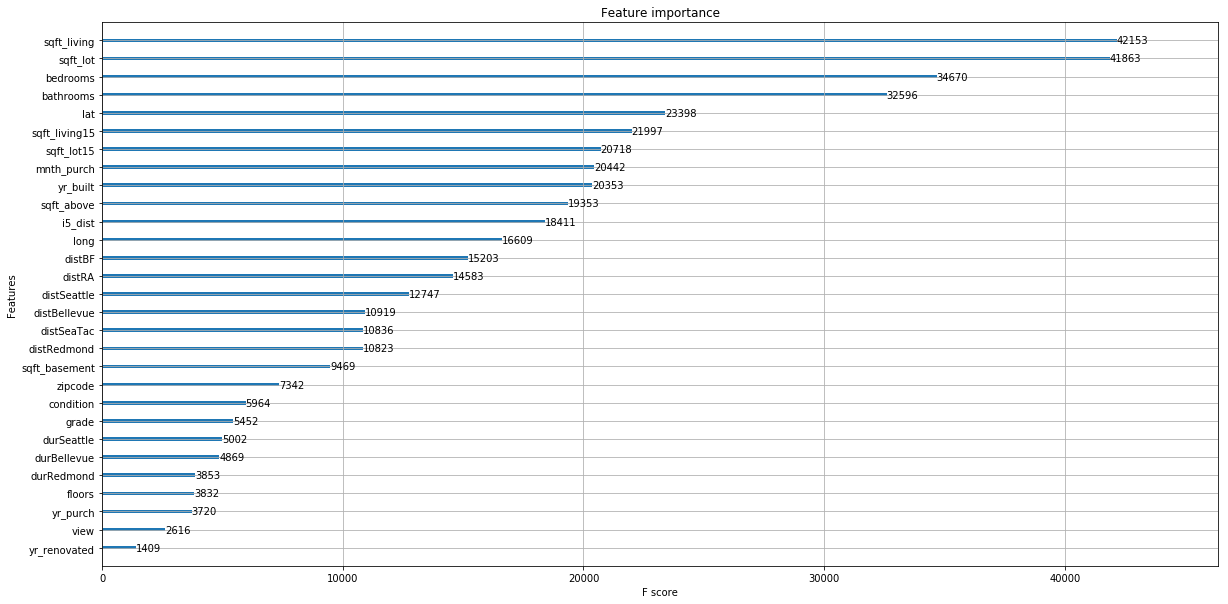

In [7]:
gbm_ci_i5_ap.fit(ci_i5_ap_train, ci_i5_ap_train_Y)
ax = xgb.plot_importance(gbm_ci_i5_ap)
fig = ax.figure
fig.set_size_inches(20, 10)